# Bibliotecas

In [58]:
import pandas as pd
import plotnine as p9
import statsmodels.formula.api as smf

# Coleta de Dados

In [40]:
dados_brutos_ipca = pd.read_json("https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2265/p/all/d/v2265%202?formato=json")
dados_brutos_ipca

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Mês (Código),Mês
1,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,197912,dezembro 1979
2,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198001,janeiro 1980
3,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198002,fevereiro 1980
4,1,Brasil,,,...,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,198003,março 1980
...,...,...,...,...,...,...,...,...,...,...,...
538,1,Brasil,2,%,4.42,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202409,setembro 2024
539,1,Brasil,2,%,4.76,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202410,outubro 2024
540,1,Brasil,2,%,4.87,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202411,novembro 2024
541,1,Brasil,2,%,4.83,1,Brasil,2265,IPCA - Variação acumulada em 12 meses,202412,dezembro 2024


In [46]:
dados_brutos_desemprego = pd.read_json("https://apisidra.ibge.gov.br/values/t/6381/n1/all/v/4099/p/all/d/v4099%201?formato=json")
dados_brutos_desemprego

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre Móvel (Código),Trimestre Móvel
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,jan-fev-mar 2012
2,1,Brasil,2,%,7.8,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,fev-mar-abr 2012
3,1,Brasil,2,%,7.7,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201205,mar-abr-mai 2012
4,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201206,abr-mai-jun 2012
...,...,...,...,...,...,...,...,...,...,...,...
150,1,Brasil,2,%,6.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202408,jun-jul-ago 2024
151,1,Brasil,2,%,6.4,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202409,jul-ago-set 2024
152,1,Brasil,2,%,6.2,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202410,ago-set-out 2024
153,1,Brasil,2,%,6.1,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",202411,set-out-nov 2024


# Tratamento de Dados

In [19]:
dados_tratados_ipca = (
    dados_brutos_ipca
    .rename(columns={"V":"ipca","D3C":"data"})
    .query("ipca not in ['Valor','...']")
    .assign(
        data=lambda x: pd.to_datetime(x.data, format="%Y%m"),
        ipca=lambda x: x.ipca.astype(float)
        )
    .filter(["data","ipca"])
    .query("data >= @pd.to_datetime('2004-01-01')")
)
dados_tratados_ipca

,data,ipca
290,2004-01-01,7.71
291,2004-02-01,6.69
292,2004-03-01,5.89
293,2004-04-01,5.26
294,2004-05-01,5.15
...,...,...
538,2024-09-01,4.42
539,2024-10-01,4.76
540,2024-11-01,4.87
541,2024-12-01,4.83


In [48]:
dados_tratados_desemprego = (
  dados_brutos_desemprego
    .rename(columns={"V":"desemprego","D3C":"data"})
    .query("desemprego not in ['Valor','...']")
    .assign(
        data=lambda x: pd.to_datetime(x.data, format="%Y%m"),
        desemprego=lambda x: x.desemprego.astype(float)
        )
    .filter(["data","desemprego"])
    .query("data >= @pd.to_datetime('2004-01-01')")
)
dados_tratados_desemprego

,data,desemprego
1,2012-03-01,8.0
2,2012-04-01,7.8
3,2012-05-01,7.7
4,2012-06-01,7.6
5,2012-07-01,7.5
...,...,...
150,2024-08-01,6.6
151,2024-09-01,6.4
152,2024-10-01,6.2
153,2024-11-01,6.1


In [54]:
dados_cruzados = dados_tratados_ipca.set_index("data").join(other = dados_tratados_desemprego.set_index("data"),how = "inner").reset_index()
dados_cruzados

,data,ipca,desemprego
0,2012-03-01,5.24,8.0
1,2012-04-01,5.10,7.8
2,2012-05-01,4.99,7.7
3,2012-06-01,4.92,7.6
4,2012-07-01,5.20,7.5
...,...,...,...
149,2024-08-01,4.24,6.6
150,2024-09-01,4.42,6.4
151,2024-10-01,4.76,6.2
152,2024-11-01,4.87,6.1


# Análise de Dados

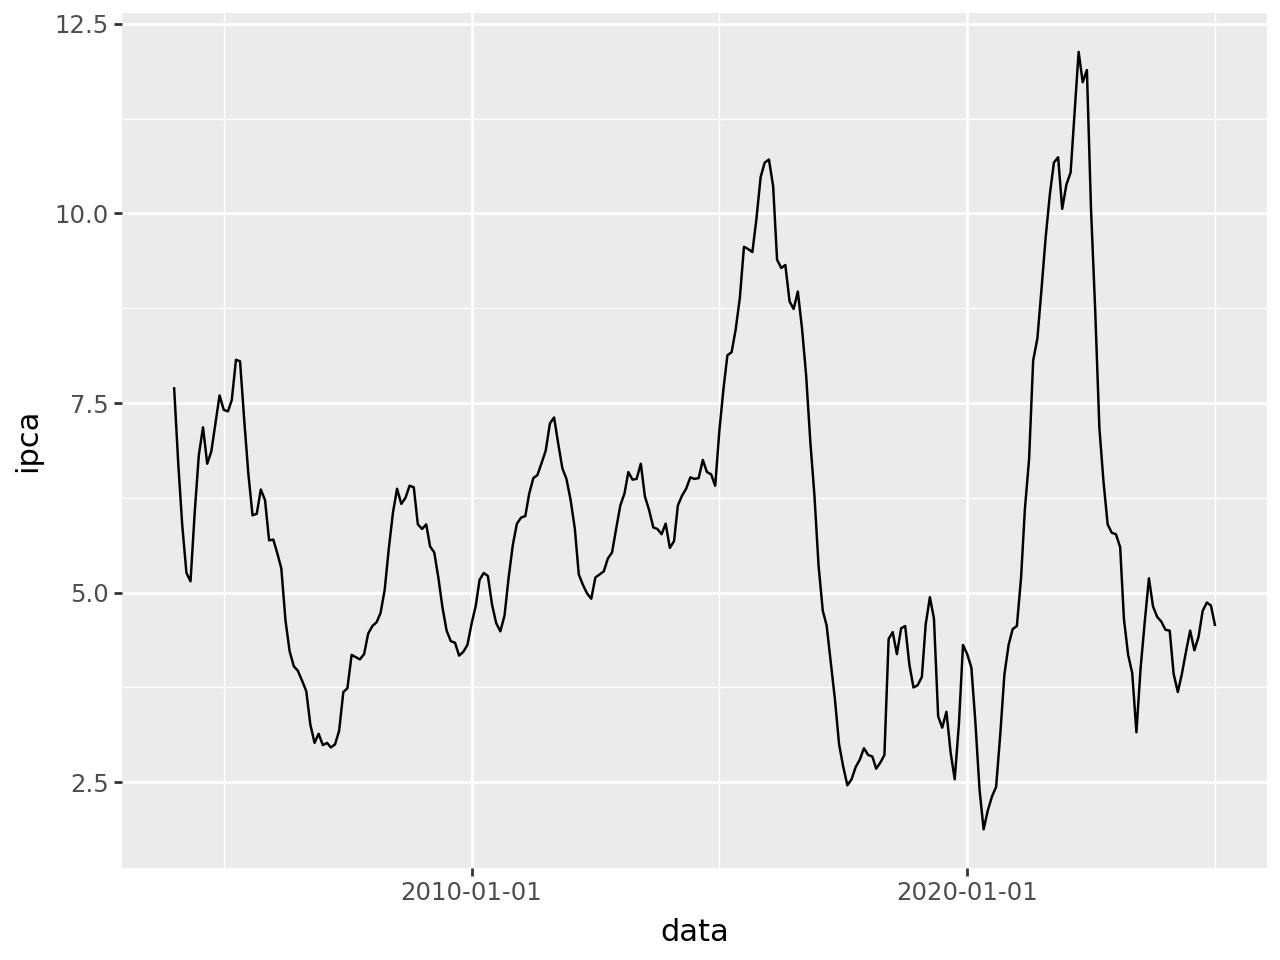

In [20]:
# Como a inflação se comportou no Brasil?
(
    p9.ggplot(dados_tratados_ipca) +
    p9.aes(x= "data", y= "ipca") +
    p9.geom_line()
)

In [36]:
# Qual o período com menores e maiores taxas de inflação?
print(dados_tratados_ipca.sort_values("ipca").set_index("data").iloc[0])
print(dados_tratados_ipca.query("ipca == ipca.max()"))
print(dados_tratados_ipca.query("ipca == ipca.min()"))

ipca    1.88
Name: 2020-05-01 00:00:00, dtype: float64
          data   ipca
509 2022-04-01  12.13
          data  ipca
486 2020-05-01  1.88


In [37]:
# Qual o valor médio da inflação do Brasil e como é a distribuição de seus valores?

dados_tratados_ipca.ipca.describe()

,ipca
count,253.000000
mean,5.707233
std,2.112745
min,1.880000
25%,4.230000
50%,5.450000
75%,6.590000
max,12.130000


/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


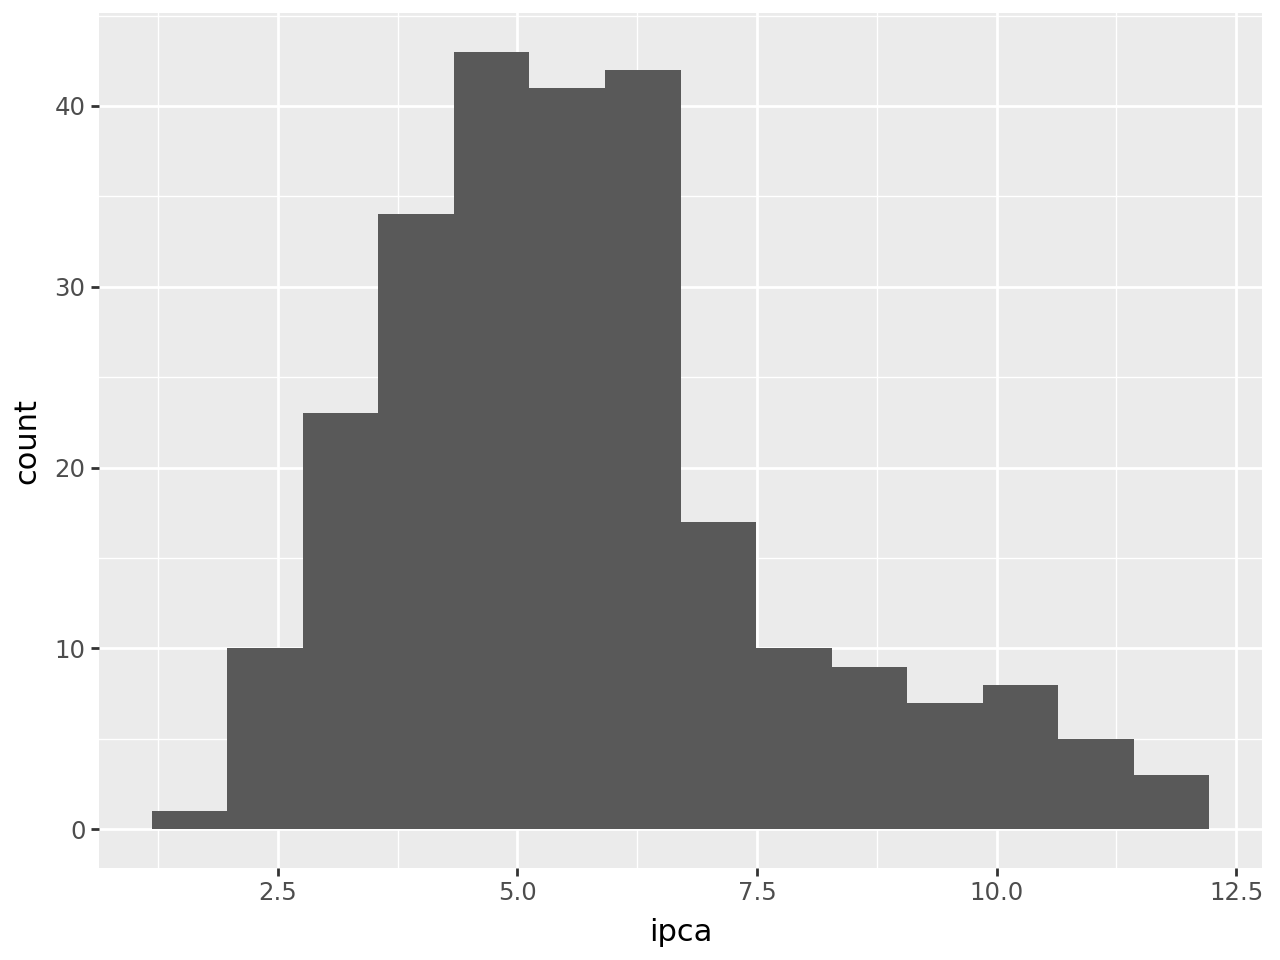

In [38]:
(
    p9.ggplot(dados_tratados_ipca) +
    p9.aes(x="ipca") +
    p9.geom_histogram()
)

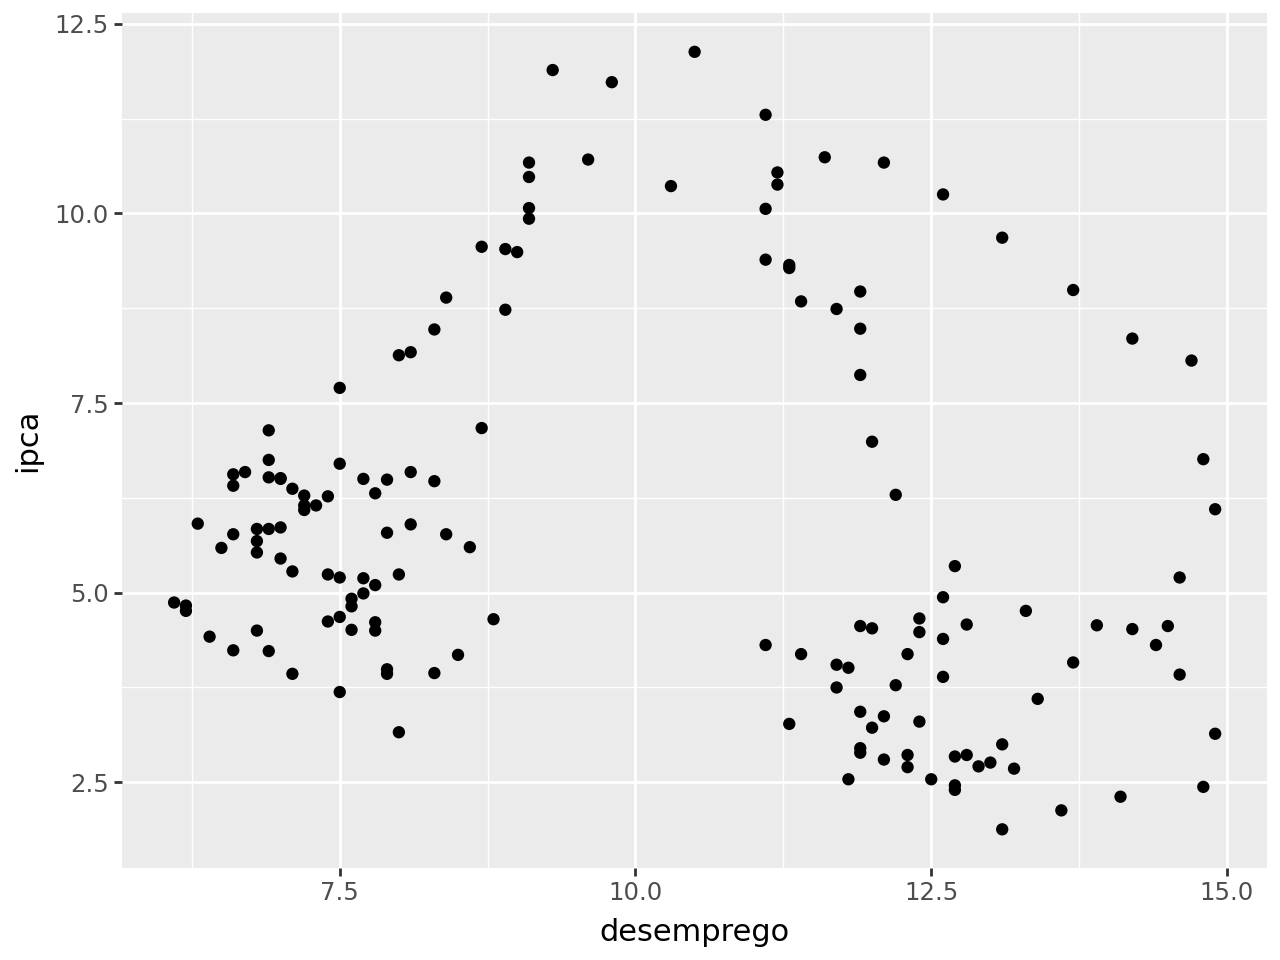

In [56]:
# O que afeta a inflação do Brasil e como é a distribuição de seus valores?
(
    p9.ggplot(dados_cruzados) +
    p9.aes(x="desemprego",y="ipca") +
    p9.geom_point()
)

In [59]:
modelo = smf.ols("ipca ~ desemprego", data = dados_cruzados).fit()
modelo

In [61]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   ipca   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.341
Date:                Tue, 18 Feb 2025   Prob (F-statistic):             0.0389
Time:                        20:49:05   Log-Likelihood:                -356.23
No. Observations:                 154   AIC:                             716.5
Df Residuals:                     152   BIC:                             722.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4372      0.776      9.585      0.0

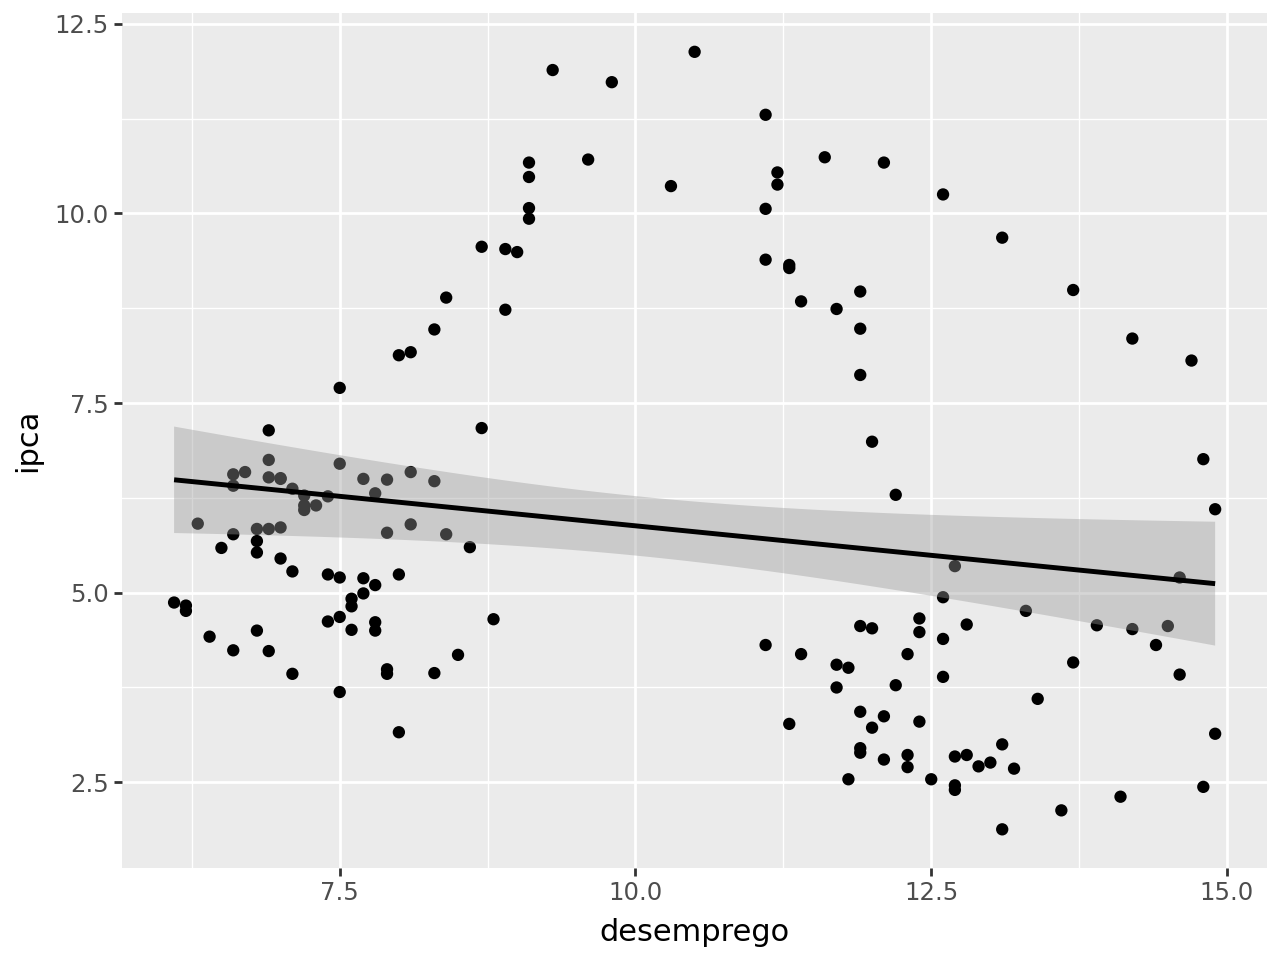

In [64]:
(
    p9.ggplot(dados_cruzados) +
    p9.aes(x="desemprego",y="ipca") +
    p9.geom_point() +
    p9.geom_smooth(method="lm")
)